<a href="https://colab.research.google.com/github/Imran-co/Machine-Intelligence--2-/blob/main/Snake_and_Ladder_RL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps to win:
At 0, rolled 4, moved to 14
At 14, rolled 6, moved to 38
At 38, rolled 2, moved to 59
At 59, rolled 6, moved to 65
At 65, rolled 6, moved to 91
At 91, rolled 5, moved to 96
At 96, rolled 4, moved to 100
Total moves: 7

Visualizing agent's path:


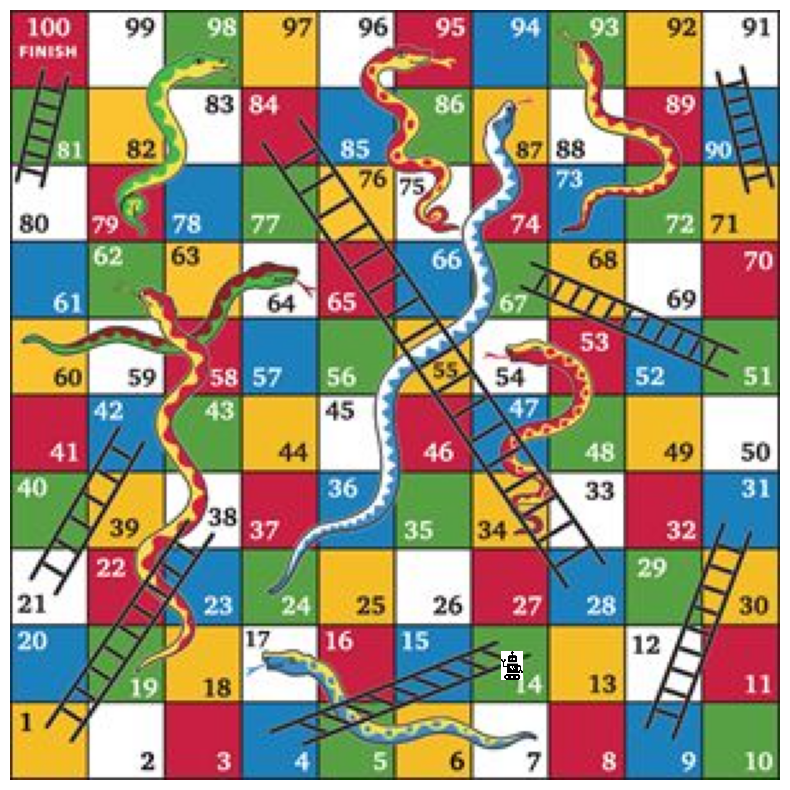

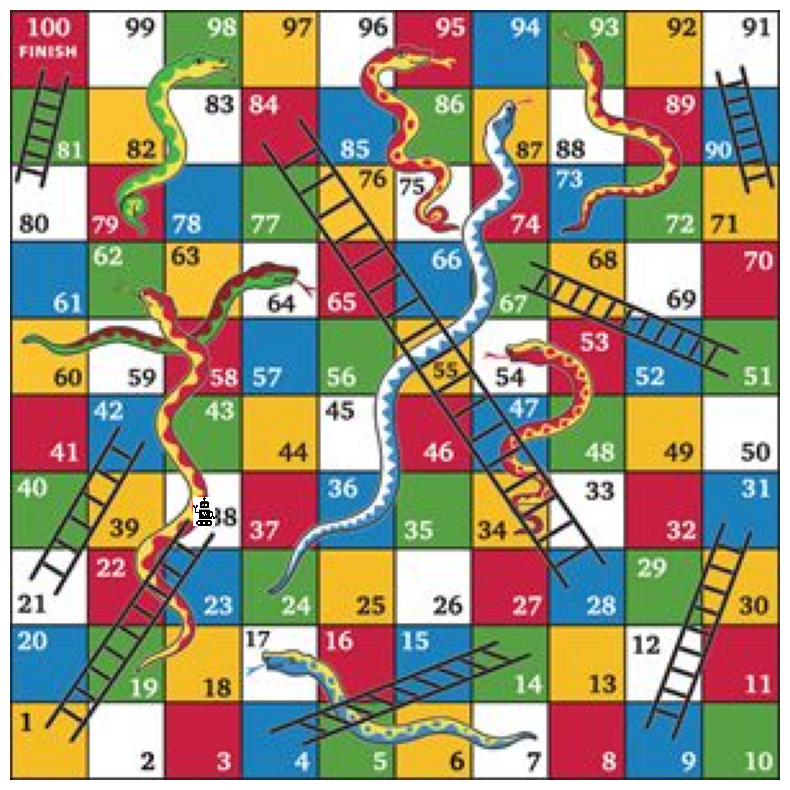

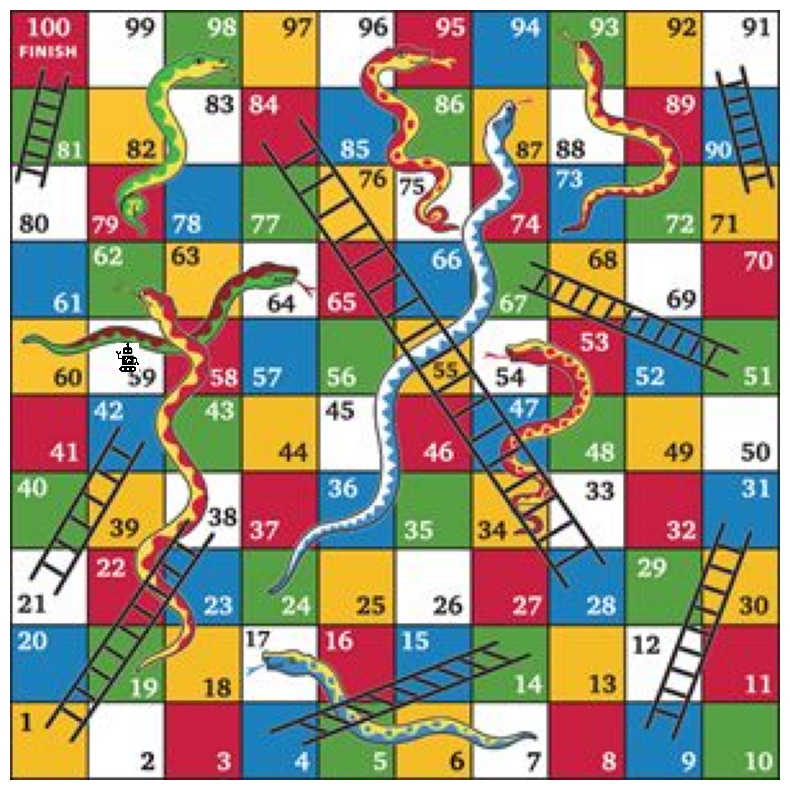

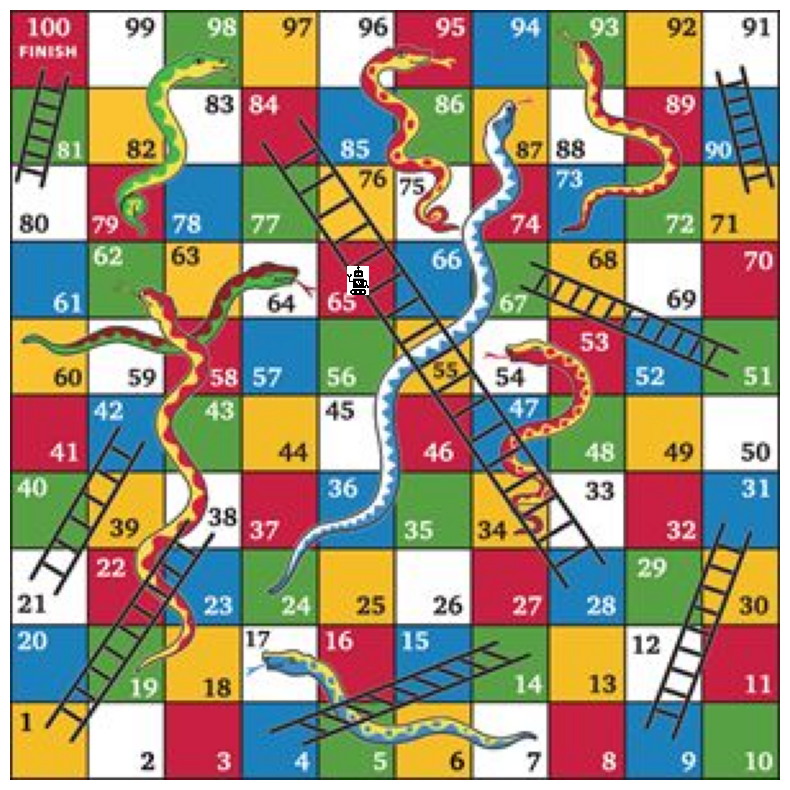

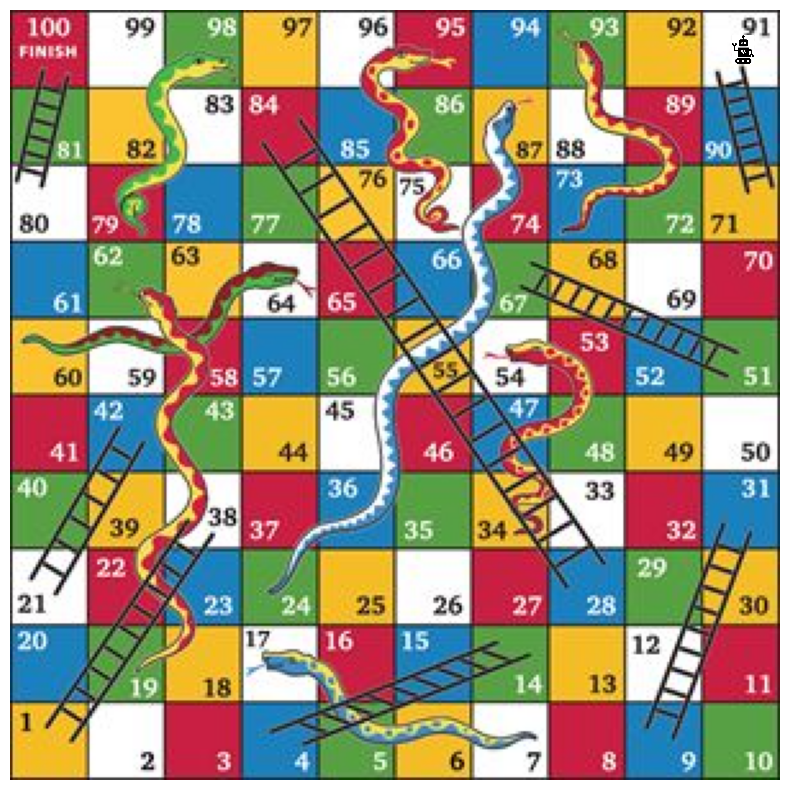

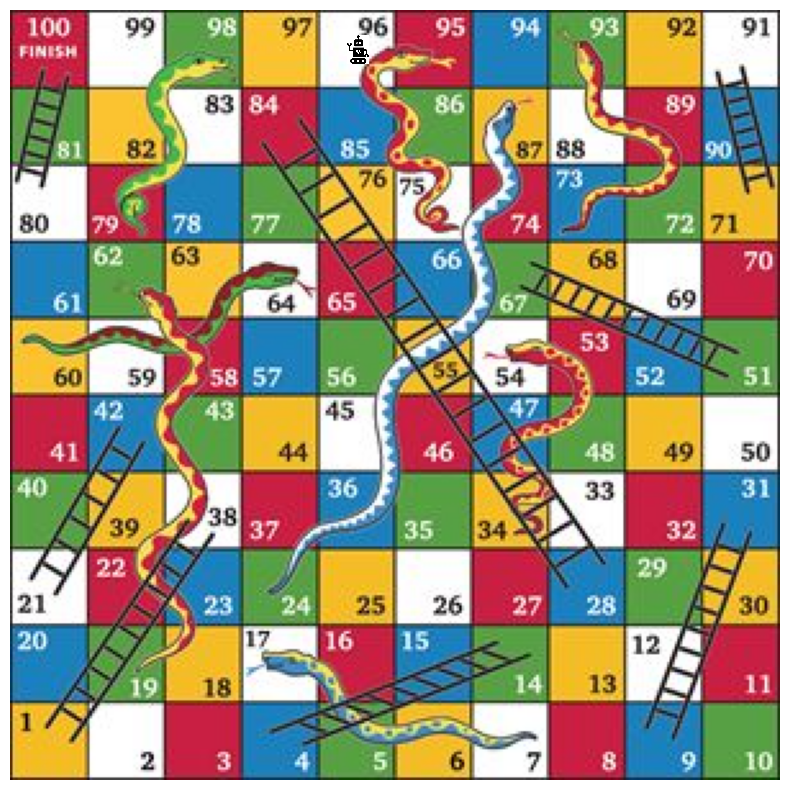

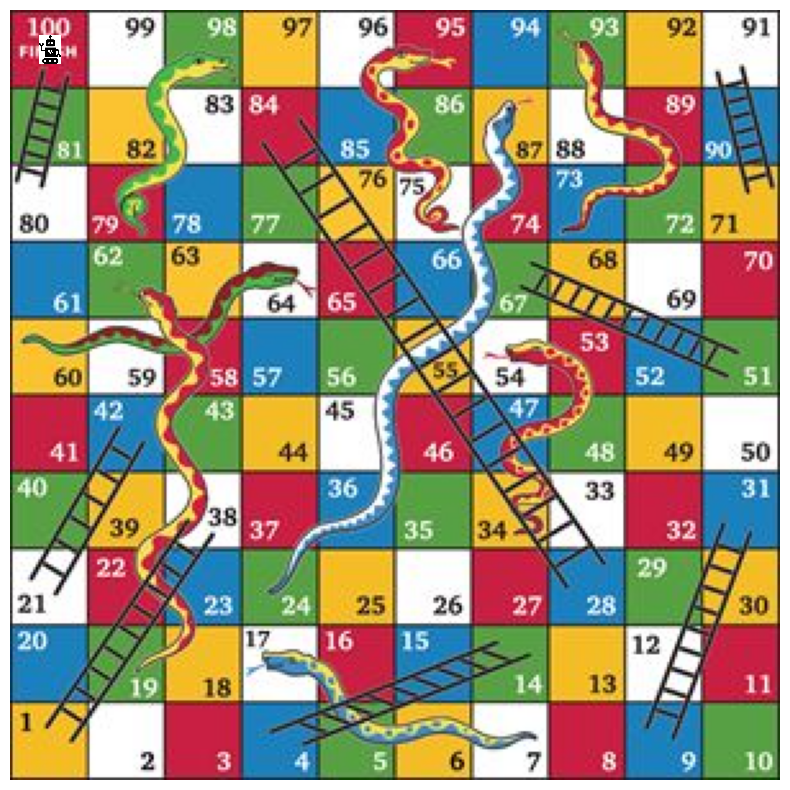

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load images (provide your own file paths)
board_img = mpimg.imread('snake ladder board.jpg')
agent_img = mpimg.imread('Agent.png')

# Board configuration
N = 100
board_size = 10  # 10x10 board

def get_position_coords(pos, img_shape):
    """Map board position to image coordinates."""
    if pos < 1 or pos > 100:
        return None, None
    row = (pos - 1) // board_size
    col = (pos - 1) % board_size
    # Alternate direction every row (snake-like board)
    if row % 2 == 1:
        col = board_size - 1 - col
    # Image origin is at top-left; board starts bottom-left
    x = col / board_size * img_shape[1] + img_shape[1] / (2 * board_size)
    y = img_shape[0] - (row / board_size * img_shape[0] + img_shape[0] / (2 * board_size))
    return x, y

def plot_board_with_agent(agent_pos):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(board_img)
    x, y = get_position_coords(agent_pos, board_img.shape)
    if x is not None and y is not None:
        # Scale agent image to fit cell size
        zoom = 0.08
        imgbox = OffsetImage(agent_img, zoom=zoom)
        ab = AnnotationBbox(imgbox, (x, y), frameon=False)
        ax.add_artist(ab)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# Board setup for Q-learning
N = 100
ladders = {
    4: 14,
    9: 31,
    20: 38,
    28: 84,
    40: 59,
    51: 67,
    63: 81,
    71: 91
}

snakes = {
    17: 7,
    54: 34,
    62: 19,
    64: 60,
    87: 36,
    93: 73,
    95: 75,
    98: 79
}

def move(pos, dice):
    next_pos = pos + dice
    if next_pos > N:
        return pos  # can't move if overshoots
    next_pos = ladders.get(next_pos, next_pos)
    next_pos = snakes.get(next_pos, next_pos)
    return next_pos

# Q-learning parameters
q_table = np.zeros((N+1, 6))  # States: 0-100, Actions: dice 1-6
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor
epsilon = 0.1  # exploration rate
episodes = 50000

# Q-learning training
for ep in range(episodes):
    state = 0
    while state < N:
        if random.random() < epsilon:
            action = random.randint(0, 5)  # Explore: dice roll 1-6
        else:
            action = np.argmax(q_table[state])  # Exploit

        dice = action + 1
        next_state = move(state, dice)
        reward = 100 if next_state == N else -1

        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )
        state = next_state

# Play with trained agent
def play_game():
    state = 0
    moves = []
    while state < N:
        action = np.argmax(q_table[state])
        dice = action + 1
        next_state = move(state, dice)
        moves.append((state, dice, next_state))
        state = next_state
    return moves

if __name__ == "__main__":
    # Train the agent and get the steps
    steps = play_game()

    # Print the steps
    print("Steps to win:")
    for (from_pos, dice, to_pos) in steps:
        print(f"At {from_pos}, rolled {dice}, moved to {to_pos}")
    print(f"Total moves: {len(steps)}")

    # Visualize the agent's path
    print("\nVisualizing agent's path:")
    for (from_pos, dice, to_pos) in steps:
        plot_board_with_agent(to_pos)